In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import cartopy.crs as ccrs

import xarray as xr

In this notebook I compute a first approach to the dataset, understanding the main components for further processing.

# Functions

In [110]:
def plot_worldmap(data, label=None, title=None, vmin=None, vmax=None):
    plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())  # Use Plate Carree projection for global map

    # Plot the data
    data.plot.pcolormesh(
        ax=ax,
        transform=ccrs.PlateCarree(),  # Transform to Plate Carree for correct projection
        x='lon',                        # Longitude coordinate
        y='lat',                        # Latitude coordinate
        cmap='coolwarm',                # Use a colormap like 'coolwarm' for temperature
        vmin=vmin,                      # Minimum value for color scale
        vmax=vmax,                      # Maximum value for color scale
        cbar_kwargs={'label': label}    # Colorbar label
    )

    # Add coastlines and gridlines for context
    ax.coastlines()
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    # Set a title
    plt.title(title)

    plt.show()

# Import

Let's import a single granule of the dataset. The file is .nc4 so the `xarray` library is needed.

In [ ]:
file_path='SNDRSNML2RMS_1-20241110_220957/SNDR.SNPP.ATMS.20150101T0124.m06.g015.L2_RAMSES2_RET.std.v01_41_00.J.210430050814.nc'

In [ ]:
# Open the NetCDF file
data = xr.open_dataset(file_path,engine='netcdf4')  # or 'netcdf4' if NetCDF

In [4]:
data

<xarray.Dataset> Size: 98MB
Dimensions:                    (atrack: 135, xtrack: 96, utc_tuple: 8,
                                fov_poly: 8, spatial: 3, attitude: 3,
                                air_pres: 100, air_pres_h2o: 66)
Coordinates:
    lat                        (atrack, xtrack) float32 52kB ...
    lon                        (atrack, xtrack) float32 52kB ...
    subsat_lat                 (atrack) float32 540B ...
    subsat_lon                 (atrack) float32 540B ...
    attitude_lbl               (attitude) <U5 60B ...
    spatial_lbl                (spatial) <U1 12B ...
    utc_tuple_lbl              (utc_tuple) <U11 352B ...
  * air_pres                   (air_pres) float32 400B 1.606 3.838 ... 1.1e+05
  * air_pres_h2o               (air_pres_h2o) float32 264B 5.153e+03 ... 1.1e+05
Dimensions without coordinates: atrack, xtrack, utc_tuple, fov_poly, spatial,
                                attitude
Data variables: (12/96)
    obs_id                     (atrack, xtrack) <U20 1MB ...
    obs_time_tai93             (atrack, xtrack) datetime64[ns] 104kB ...
    obs_time_utc               (atrack, xtrack, utc_tuple) float32 415kB ...
    lat_geoid                  (atrack, xtrack) float32 52kB ...
    lon_geoid                  (atrack, xtrack) float32 52kB ...
    lat_bnds                   (atrack, xtrack, fov_poly) float32 415kB ...
    ...                         ...
    tpause_pres_qc             (atrack, xtrack) float32 52kB ...
    tpause_temp                (atrack, xtrack) float32 52kB ...
    tpause_temp_qc             (atrack, xtrack) float32 52kB ...
    air_pres_nsurf             (atrack, xtrack) float32 52kB ...
    air_pres_h2o_nsurf         (atrack, xtrack) float32 52kB ...
    mw_surf_class              (atrack, xtrack) float32 52kB ...
Attributes: (12/82)
    keywords:                          ATMOSPHERE > ATMOSPHERIC TEMPERATURE >...
    Conventions:                       CF-1.6, ACDD-1.3
    source:                            ATMS instrument telemetry
    processing_level:                  2
    comment:                           
    acknowledgment:                    Support for this research was provided...
    ...                                ...
    AutomaticQualityFlag:              Passed
    qa_pct_data_missing:               0.0
    qa_pct_data_geo:                   100.0
    qa_pct_data_sci_mode:              0.0
    qa_no_data:                        FALSE
    metadata_link:                     http://disc.sci.gsfc.nasa.gov/

# Time dimension analysis

`obs_time_tai93` is a variable representing the timestamp of each sample. Let's open it and analyze his content.

In [19]:
data['obs_time_tai93']

<xarray.DataArray 'obs_time_tai93' (atrack: 135, xtrack: 96)> Size: 104kB
[12960 values with dtype=datetime64[ns]]
Coordinates:
    lat         (atrack, xtrack) float32 52kB ...
    lon         (atrack, xtrack) float32 52kB ...
    subsat_lat  (atrack) float32 540B ...
    subsat_lon  (atrack) float32 540B ...
Dimensions without coordinates: atrack, xtrack
Attributes:
    valid_range:            [-2.93483522e+09  3.37659841e+09]
    long_name:              earth view FOV midtime
    coverage_content_type:  referenceInformation
    standard_name:          time
    description:            earth view observation midtime for each FOV
    AIRS_HDF_name:          Time

In [20]:
data['obs_time_tai93'].values

array([['2015-01-01T01:24:10.009068928', '2015-01-01T01:24:10.027086976',
        '2015-01-01T01:24:10.045105024', ...,
        '2015-01-01T01:24:11.684742016', '2015-01-01T01:24:11.702759936',
        '2015-01-01T01:24:11.720777984'],
       ['2015-01-01T01:24:12.675734016', '2015-01-01T01:24:12.693752064',
        '2015-01-01T01:24:12.711769984', ...,
        '2015-01-01T01:24:14.351405056', '2015-01-01T01:24:14.369422976',
        '2015-01-01T01:24:14.387441024'],
       ['2015-01-01T01:24:15.342396928', '2015-01-01T01:24:15.360414976',
        '2015-01-01T01:24:15.378433024', ...,
        '2015-01-01T01:24:17.018068992', '2015-01-01T01:24:17.036087040',
        '2015-01-01T01:24:17.054105088'],
       ...,
       ['2015-01-01T01:30:02.009063040', '2015-01-01T01:30:02.027088000',
        '2015-01-01T01:30:02.045107968', ...,
        '2015-01-01T01:30:03.684744064', '2015-01-01T01:30:03.702761984',
        '2015-01-01T01:30:03.720780032'],
       ['2015-01-01T01:30:04.675736960', '20

If we filter for a determined point in the space, we are able to see the moment in which has been recorded.

In [23]:
data['obs_time_tai93'].sel(atrack=0, xtrack=0).values

np.datetime64('2015-01-01T01:24:10.009068928')

# Space Dimension analysis

#### 1. **atrack and xtrack Dimensions**
- **`atrack`** (along-track): This dimension represents the "along-track" direction, which is the path along which the satellite or instrument is moving. Imagine a satellite moving in a straight line over the Earth's surface, collecting data as it goes; each point along that line corresponds to an `atrack` index.
- **`xtrack`** (cross-track): This dimension represents the "across-track" direction, which is perpendicular to the `atrack`. Satellites often collect data in a swath that extends outwards on either side of their path, covering a broader area. Each point in `xtrack` corresponds to a position across this swath, perpendicular to the movement direction.

In the dataset:
- `atrack` has 135 values, representing different positions along the satellite's path.
- `xtrack` has 96 values, representing different positions across each swath at each `atrack` position.

#### 2. **lat and lon Coordinates**
- **`lat`** and **`lon`** provide geographic coordinates for each `(atrack, xtrack)` point. 
  - `lat` (latitude): Specifies the north-south position of each point, ranging from -90° (South Pole) to +90° (North Pole).
  - `lon` (longitude): Specifies the east-west position, ranging from -180° to +180°.
  
In this context:
- For each `(atrack, xtrack)` combination, there is a unique pair of `(lat, lon)` coordinates, giving the exact location on the Earth's surface where the data (like temperature) was measured.

#### Putting It All Together
When we look at a point in this data structure, it has four elements:
- **`atrack`**: The position along the satellite's path.
- **`xtrack`**: The position across the swath at that point in the path.
- **`lat`** and **`lon`**: The exact geographical location corresponding to each `(atrack, xtrack)` combination.

#### Example Visualization of Tracks
Imagine the dataset as a 2D grid on the Earth’s surface:
- The satellite moves along `atrack`, creating a line of data points.
- At each `atrack` position, the sensor scans across `xtrack`, capturing data to the left and right of the satellite's path.
- Each `(atrack, xtrack)` point has a specific latitude and longitude, giving the geographical context of each measurement.

This way, you end up with a grid of data points covering an area on Earth, where each point has both a `lat` and `lon` associated with it, corresponding to its `(atrack, xtrack)` indices.

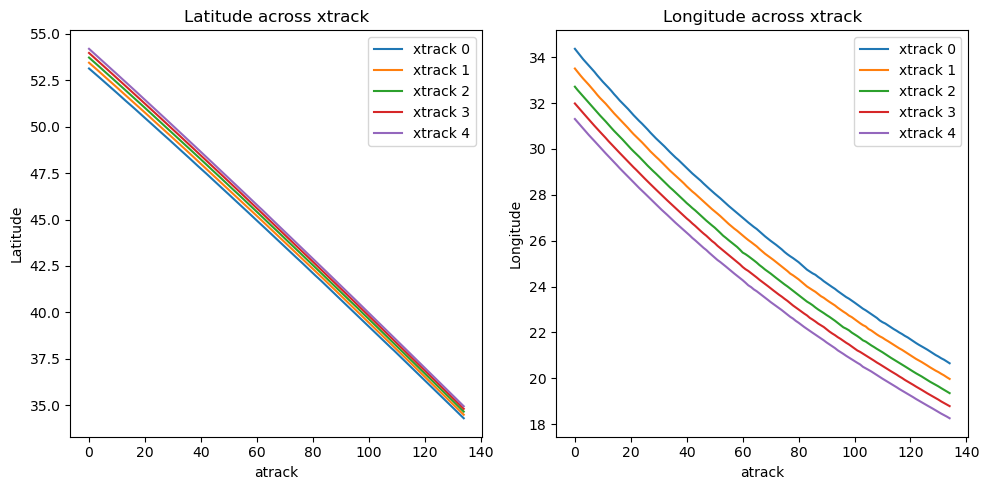

In [62]:

# Plot latitude and longitude for each xtrack position along atrack
plt.figure(figsize=(10, 5))

# Plot latitudes
plt.subplot(1, 2, 1)
plt.title("Latitude across xtrack")
for i in range(5):  # Loop over xtrack positions
    plt.plot(data.atrack, data.lat[:, i], label=f'xtrack {i}')
plt.xlabel("atrack")
plt.ylabel("Latitude")
plt.legend()

# Plot longitudes
plt.subplot(1, 2, 2)
plt.title("Longitude across xtrack")
for i in range(5):  # Loop over xtrack positions
    plt.plot(data.atrack, data.lon[:, i], label=f'xtrack {i}')
plt.xlabel("atrack")
plt.ylabel("Longitude")
plt.legend()

plt.tight_layout()
plt.show()


In [63]:
data['lat']

<xarray.DataArray 'lat' (atrack: 135, xtrack: 96)> Size: 52kB
[12960 values with dtype=float32]
Coordinates:
    lat         (atrack, xtrack) float32 52kB ...
    lon         (atrack, xtrack) float32 52kB ...
    subsat_lat  (atrack) float32 540B ...
    subsat_lon  (atrack) float32 540B ...
Dimensions without coordinates: atrack, xtrack
Attributes:
    valid_range:            [-90.  90.]
    long_name:              latitude
    bounds:                 lat_bnds
    coverage_content_type:  referenceInformation
    standard_name:          latitude
    units:                  degrees_north
    description:            latitude of FOV center
    AIRS_HDF_name:          Latitude

In [64]:
data['lon']

<xarray.DataArray 'lon' (atrack: 135, xtrack: 96)> Size: 52kB
[12960 values with dtype=float32]
Coordinates:
    lat         (atrack, xtrack) float32 52kB ...
    lon         (atrack, xtrack) float32 52kB ...
    subsat_lat  (atrack) float32 540B ...
    subsat_lon  (atrack) float32 540B ...
Dimensions without coordinates: atrack, xtrack
Attributes:
    valid_range:            [-180.  180.]
    long_name:              longitude
    bounds:                 lon_bnds
    coverage_content_type:  referenceInformation
    standard_name:          longitude
    units:                  degrees_east
    description:            longitude of FOV center
    AIRS_HDF_name:          Longitude

# Multi-dimensional variable analysis

`Air_temp` is a variable recorded along latitute, longitude and air pressure.

In [65]:
data['air_temp']

<xarray.DataArray 'air_temp' (atrack: 135, xtrack: 96, air_pres: 100)> Size: 5MB
[1296000 values with dtype=float32]
Coordinates:
    lat         (atrack, xtrack) float32 52kB ...
    lon         (atrack, xtrack) float32 52kB ...
    subsat_lat  (atrack) float32 540B ...
    subsat_lon  (atrack) float32 540B ...
  * air_pres    (air_pres) float32 400B 1.606 3.838 7.688 ... 1.071e+05 1.1e+05
Dimensions without coordinates: atrack, xtrack
Attributes:
    ancillary_variables:    air_temp_qc air_temp_err
    valid_range:            [100. 400.]
    long_name:              air temperature profile
    coverage_content_type:  physicalMeasurement
    standard_name:          air_temperature
    units:                  Kelvin
    description:            air temperature profile
    AIRS_HDF_name:          TAirSup
    cell_methods:           area: mean

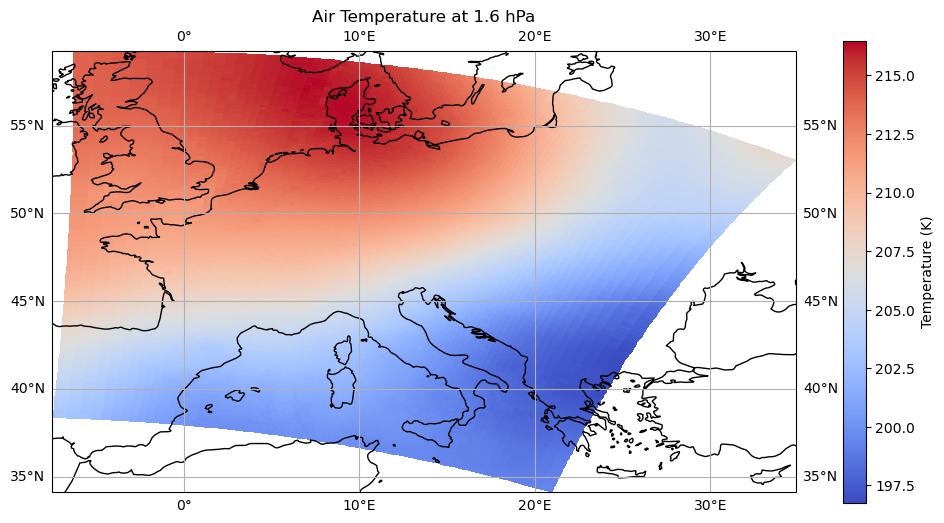

In [ ]:
# Select a specific pressure level and orbit pass
# For example, air_pres=1.6 (assuming 1.6 hPa)
air_temp_slice = data['air_temp'].sel(
    air_pres=1.6, 
    method='nearest')

plot_worldmap(air_temp_slice,label='Temperature (K)',title='Air Temperature at 1.6 hPa')

Coordinates:
    lat         float32 4B 53.13
    lon         float32 4B 34.37
    subsat_lat  float32 4B ...
    subsat_lon  float32 4B ...
  * air_pres    (air_pres) float32 400B 1.606 3.838 7.688 ... 1.071e+05 1.1e+05


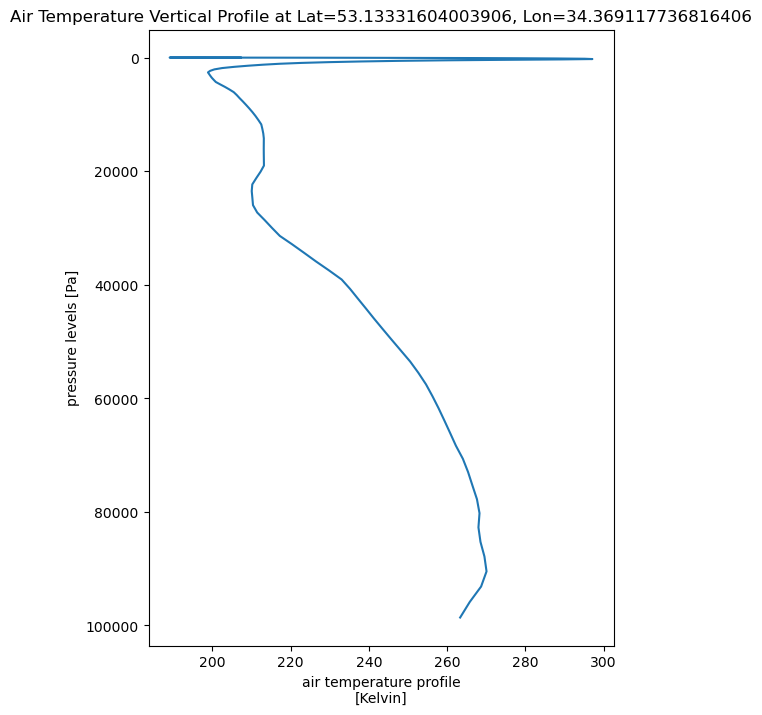

In [ ]:
# Select a specific latitude and longitude
air_temp_profile = data['air_temp'].sel(
    atrack=0,
    xtrack=0)

print(air_temp_profile.coords)

# Plot the vertical profile
plt.figure(figsize=(6, 8))
air_temp_profile.plot(y='air_pres')
plt.gca().invert_yaxis()  # Invert y-axis so higher pressures are at the bottom
plt.title(f"Air Temperature Vertical Profile at Lat={air_temp_profile.lat.values}, Lon={air_temp_profile.lon.values}")
plt.show()


/var/folders/d9/k27_kqbn1yvdcwxq44w79hw80000gn/T/ipykernel_37170/4094783955.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_ticks[::-1].astype(int))  # Reverse the order of tick labels


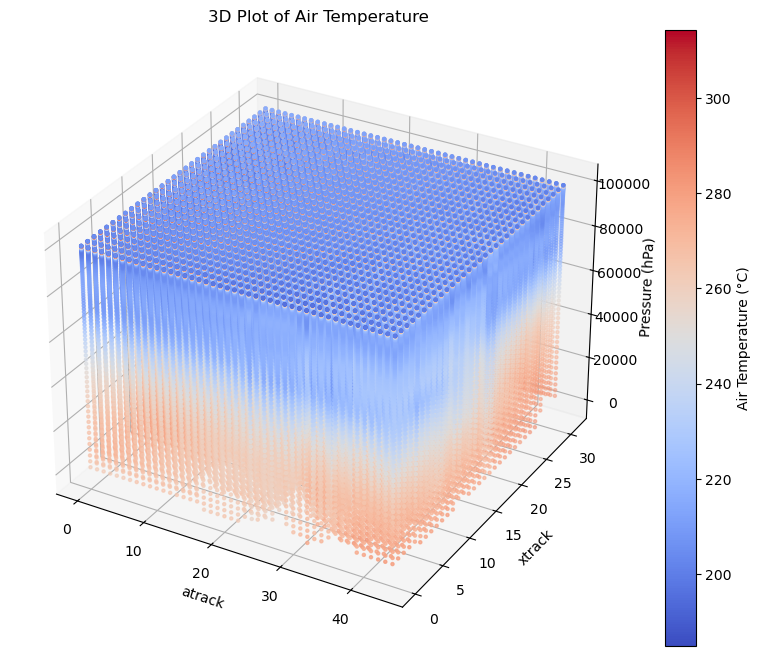

In [71]:
# Sampling data to make the plot manageable by selecting every 10th lat/lon point
air_temp_sample = data['air_temp'][::3,::3,::]

# Extract latitude, longitude, pressure, and air_temp values for plotting
latitudes = air_temp_sample['atrack'].values
longitudes = air_temp_sample['xtrack'].values
pressures = air_temp_sample['air_pres'].values
air_temperatures = air_temp_sample.values.flatten()

# Create meshgrid for lat, lon, and air_pres values
lat_mesh, lon_mesh, pres_mesh = np.meshgrid(latitudes, longitudes, pressures, indexing='ij')

# Flatten the meshgrid arrays for scatter plotting
lat_vals = lat_mesh.flatten()
lon_vals = lon_mesh.flatten()
pres_vals = pres_mesh.flatten()

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points
sc = ax.scatter(lat_vals, lon_vals, pres_vals, c=air_temperatures, cmap='coolwarm', s=5)
plt.colorbar(sc, ax=ax, label="Air Temperature (°C)")

# Set labels and title
ax.set_xlabel("atrack")
ax.set_ylabel("xtrack")
ax.set_zlabel("Pressure (hPa)")
ax.set_title("3D Plot of Air Temperature")

# Invert the z-axis so that lower pressures are at the top
ax.invert_zaxis()

# Correct the Z-axis ticks
z_ticks = ax.get_zticks()
ax.set_zticklabels(z_ticks[::-1].astype(int))  # Reverse the order of tick labels

plt.show()


# 2D Variable analysis

`Surf_temp` is a variable collected only along `lat` and `lon`.

In [72]:
data['surf_temp']

<xarray.DataArray 'surf_temp' (atrack: 135, xtrack: 96)> Size: 52kB
[12960 values with dtype=float32]
Coordinates:
    lat         (atrack, xtrack) float32 52kB 53.13 53.44 53.72 ... 38.4 38.43
    lon         (atrack, xtrack) float32 52kB 34.37 33.51 ... -6.311 -7.091
    subsat_lat  (atrack) float32 540B ...
    subsat_lon  (atrack) float32 540B ...
Dimensions without coordinates: atrack, xtrack
Attributes:
    ancillary_variables:    surf_temp_qc surf_temp_err
    valid_range:            [100. 400.]
    long_name:              surface skin temperature
    coverage_content_type:  physicalMeasurement
    standard_name:          surface_temperature
    units:                  Kelvin
    description:            radiative temperature of the surface
    AIRS_HDF_name:          TSurfStd
    cell_methods:           area: mean

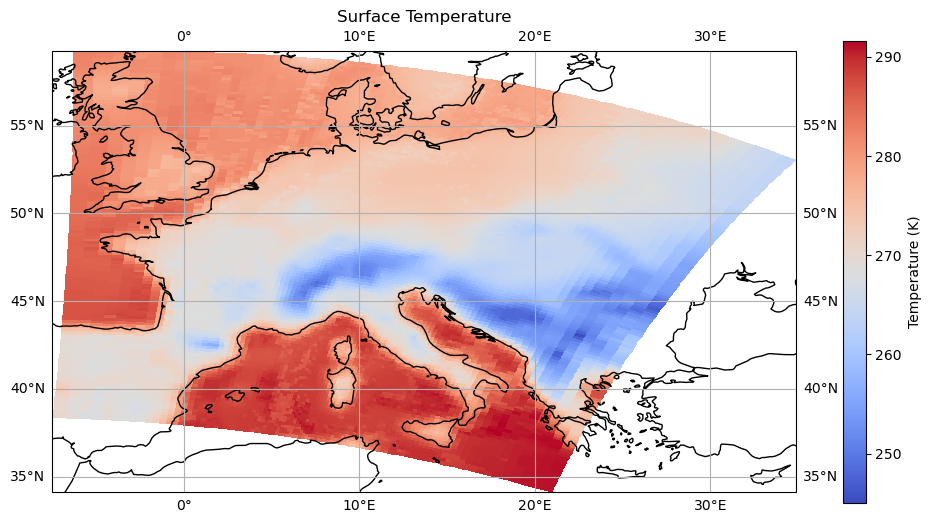

In [73]:
plot_worldmap(data['surf_temp'],label='Temperature (K)',title='Surface Temperature')

In [40]:
data['surf_alt']

<xarray.DataArray 'surf_alt' (atrack: 135, xtrack: 96)> Size: 52kB
array([[1.819070e+02, 1.973481e+02, 1.932164e+02, ..., 7.693391e+00,
        1.474491e-03, 2.834321e-02],
       [1.806896e+02, 1.901449e+02, 1.819236e+02, ..., 1.688202e+01,
        1.487210e-03, 2.703398e-02],
       [1.756756e+02, 1.843974e+02, 1.744611e+02, ..., 1.649966e+01,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 4.825086e+02,
        3.449656e+02, 2.476759e+02],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 5.409136e+02,
        4.205329e+02, 2.971666e+02],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 5.637709e+02,
        5.064822e+02, 3.073096e+02]], dtype=float32)
Coordinates:
    lat         (atrack, xtrack) float32 52kB 53.13 53.44 53.72 ... 38.4 38.43
    lon         (atrack, xtrack) float32 52kB 34.37 33.51 ... -6.311 -7.091
    subsat_lat  (atrack) float32 540B ...
    subsat_lon  (atrack) float32 540B ...
Dimensions without coordinates: atrack, xtrack
Attributes:
    ancillary_variables:    surf_alt_sdev
    valid_range:            [ -500. 10000.]
    long_name:              surface altitude
    coverage_content_type:  referenceInformation
    standard_name:          surface_altitude
    units:                  m
    description:            mean surface altitude wrt  earth model over the FOV
    AIRS_HDF_name:          topog
    cell_methods:           area: mean (beam-weighted)

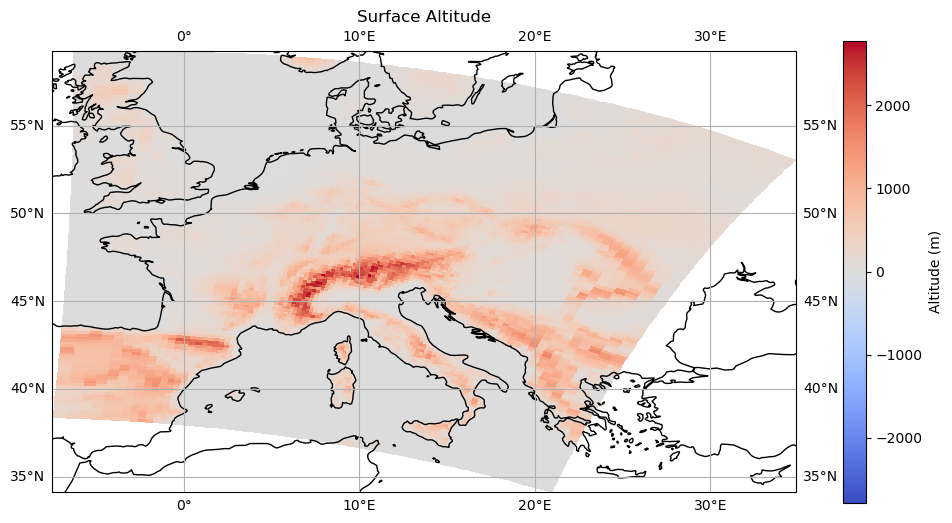

In [100]:
plot_worldmap(data['surf_alt'],label='Altitude (m)',title='Surface Altitude')

# Multi file analysis: same day, different location

Different granules can be reffered to the same days but with different location. So, in order to display different point of view of the same day, we have to open several files.

In this example, I want to display how the surface temperature is distributet along Europe on 2015-01-01.

In [3]:
PATH='SNDRSNML2RMS_1-20241110_220957'
DATE='20150101'

In [4]:
# Find all the files in the directory and select the one with the date
files = os.listdir(PATH)
filtered_files = []
for file in files:
    if DATE in file:
        filtered_files.append(os.path.join(PATH, file))

# Sort the files by time
filtered_files.sort()

In [6]:
data_list = []

# Open each file and append the data to a list
for file in filtered_files:
    data = xr.open_dataset(file,engine='netcdf4')
    data_list.append(data)

In [7]:
for data in data_list:
    print("Range longitude:", data['lon'].min().values, data['lon'].max().values)
    print("Range latitude:", data['lat'].min().values, data['lat'].max().values)
    
    print("")


Range longitude: -7.0912237 34.369118
Range latitude: 34.300316 59.176296

Range longitude: -10.123196 20.573147
Range latitude: 14.071388 38.273533

Range longitude: 10.974526 44.978043
Range latitude: 22.880608 47.44955

Range longitude: -8.45917 42.823692
Range latitude: 42.71558 68.36424

Range longitude: -15.508838 19.351177
Range latitude: 24.582886 49.206036



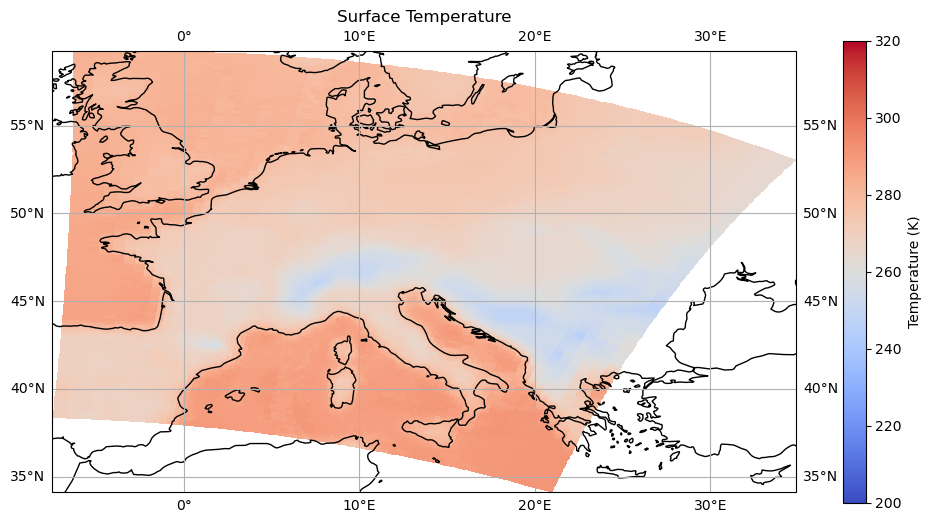

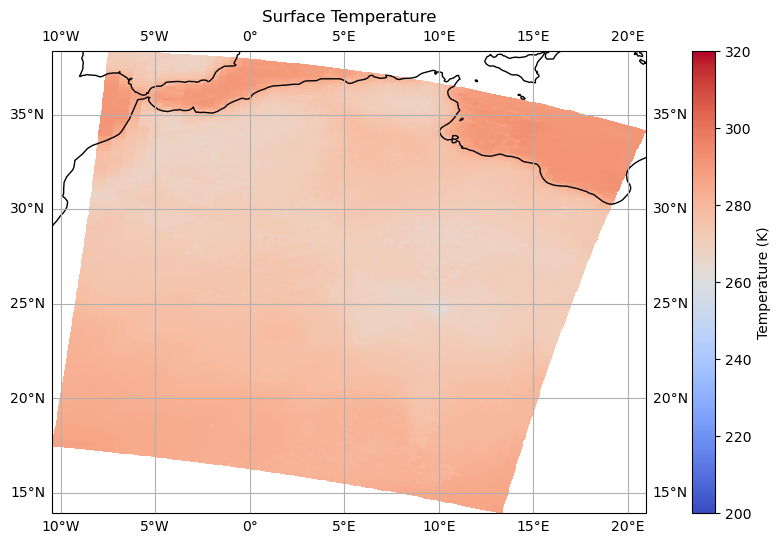

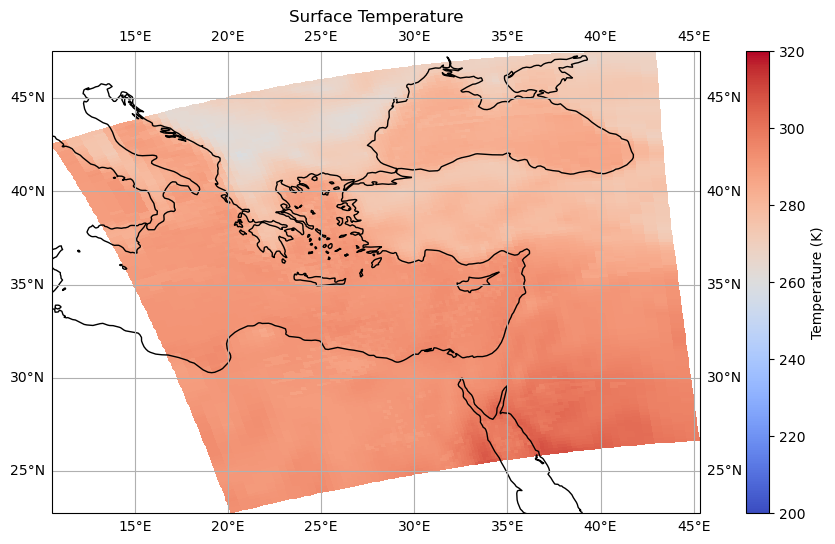

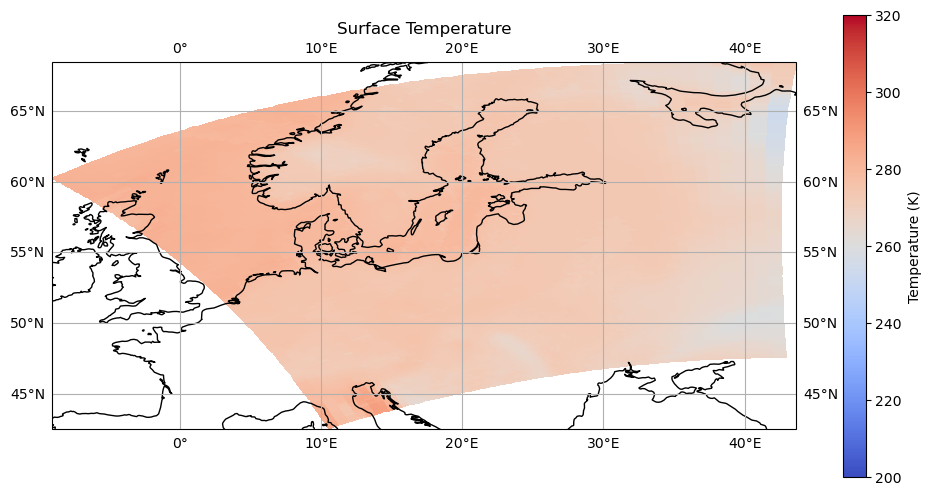

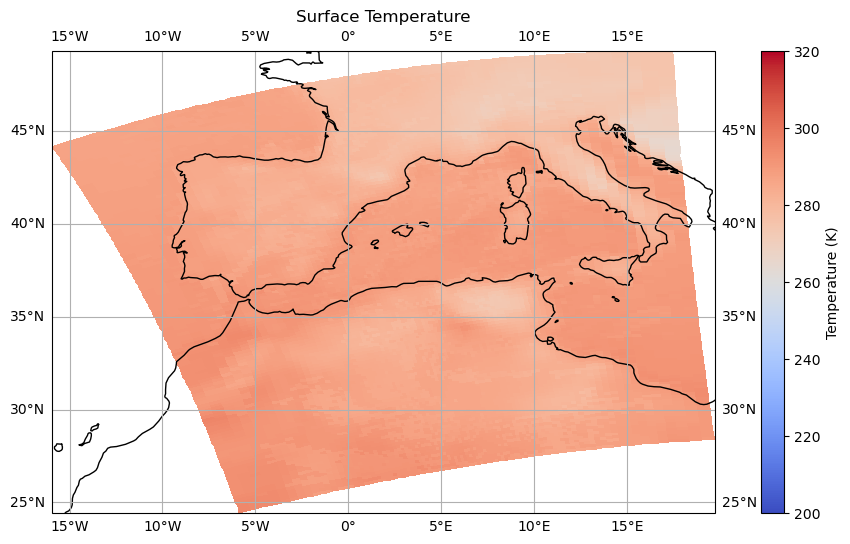

In [12]:
for data in data_list:
    plot_worldmap(data['surf_temp'],label='Temperature (K)',title='Surface Temperature',vmin=200,vmax=320)